# Imports

In [1]:
from aerobench.run_f16_sim import gcas_simulation


[ 2.00000000e+03  1.98306992e+03  1.96611595e+03  1.94913782e+03
  1.93213557e+03  1.91510927e+03  1.89805894e+03  1.88098453e+03
  1.86388595e+03  1.84676315e+03  1.82961609e+03  1.81244479e+03
  1.79524928e+03  1.77802960e+03  1.76078582e+03  1.74351803e+03
  1.72622631e+03  1.70891078e+03  1.69157156e+03  1.67420878e+03
  1.65682256e+03  1.63941306e+03  1.62198041e+03  1.60452476e+03
  1.58704625e+03  1.56954503e+03  1.55202122e+03  1.53447498e+03
  1.51690643e+03  1.49931570e+03  1.48170291e+03  1.46406818e+03
  1.44641163e+03  1.42873335e+03  1.41103344e+03  1.39331201e+03
  1.37556914e+03  1.35780492e+03  1.34001942e+03  1.32221273e+03
  1.30438491e+03  1.28653602e+03  1.26866615e+03  1.25077495e+03
  1.23286181e+03  1.21492864e+03  1.19697950e+03  1.17901989e+03
  1.16105638e+03  1.14309639e+03  1.12514802e+03  1.10721984e+03
  1.08932081e+03  1.07145989e+03  1.05364584e+03  1.03588703e+03
  1.01819136e+03  1.00056616e+03  9.83018167e+02  9.65553467e+02
  9.48177521e+02  9.30895

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [36]:
# test gcas_simulation
print(gcas_simulation(0.21*np.pi, -0.37*np.pi, -0.2*np.pi, 2000))


[ 2.00000000e+03  1.98327143e+03  1.96652003e+03  1.94974551e+03
  1.93294791e+03  1.91612731e+03  1.89928372e+03  1.88241707e+03
  1.86552728e+03  1.84861426e+03  1.83167799e+03  1.81471845e+03
  1.79773567e+03  1.78072969e+03  1.76370057e+03  1.74664839e+03
  1.72957324e+03  1.71247523e+03  1.69535447e+03  1.67821110e+03
  1.66104524e+03  1.64385704e+03  1.62664664e+03  1.60941418e+03
  1.59215981e+03  1.57488368e+03  1.55758592e+03  1.54026668e+03
  1.52292609e+03  1.50556427e+03  1.48818136e+03  1.47077746e+03
  1.45335270e+03  1.43590718e+03  1.41844100e+03  1.40095425e+03
  1.38344703e+03  1.36591941e+03  1.34837149e+03  1.33080332e+03
  1.31321499e+03  1.29560656e+03  1.27797809e+03  1.26032921e+03
  1.24265922e+03  1.22497006e+03  1.20726600e+03  1.18955284e+03
  1.17183755e+03  1.15412799e+03  1.13643271e+03  1.11876073e+03
  1.10112144e+03  1.08352415e+03  1.06597796e+03  1.04849148e+03
  1.03107281e+03  1.01372946e+03  9.96468242e+02  9.79295338e+02
  9.62216250e+02  9.45235

# Algorithm 1 - Evolutionary Algorithm Implementation and runs
#### Individual
Values of 3: roll, pitch, yaw, each value is capped according to their range.
Each value is uniformly generated initially for individual

#### Selector
Linear ranked just like week 8
Basically, rank individual according to their fitness.
Since lower altitude is better, we sort the fitness by decending order, higher fitness in front so they are assigned lower rank (according to index).

#### Mutation
Simple mutation is simply not possible since it's not bit. Therefore, for each axis, we generate 0-1 value and check against r_mutation value. For each axis, we generate a value based on gaussian distribution. The mean of this gaussian is at 0 and sigma is based on the range of axis (max value - min value of the axis) divided by 6. The use of gaussian is to make sure that small step is taken. If the value exceed the possible range, we regenerate the value again until the value no longer exceed possible range.

#### Crossover
Crossover operation is kept the same as before. We generate random check for crossover then generate the crossover point.

We run 2 variations - one with 10 pop and another with 100 pops - we notice in initial testing that 100 pops require too many evaluations before reaching a solution since it's 100 evaluations per iterations and the SA counterpart does not require that many evaluations and therefore we introduce the 10 pop variation




In [5]:

"""
EA
Indivdual has 3 variables --> limited by roll pitch yaw
go through fitness with gcas
then we perform regular linear ranked selection
cross over --> since we have 3 variables, random 50/50
then in mutation --> gaussian add with limit to certain number in order to reduce
"""
def fitness(x):
    return min(gcas_simulation(x[0], x[1], x[2], initial_altitude=2330))

def terminal_condition(population_fitness):
    return min(population_fitness) <= 0

def generate_linear_rank_distribution(scores, reverse=True):
    # reverse=True means maximization problem
    # Rank the indices based on scores
    # need to reverse because higher fitness should be better.
    ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=reverse)

    population_size = len(scores)
    # create probabilities roulette
    probabilities = [(population_size - i) / ((population_size * (population_size + 1)) / 2) for i in range(0, population_size )]

    custom_distribution = {}
    for i, idx in enumerate(ranked_indices):
        custom_distribution[idx] = probabilities[i]

    return custom_distribution

def randomize_integer(custom_distribution):
    # Extract the values and probabilities from the custom distribution
    values = list(custom_distribution.keys())
    probabilities = list(custom_distribution.values())

    # Generate a random value based on the custom distribution
    randomized_value = random.choices(values, probabilities)[0]

    return randomized_value

def selection_rank(population, scores, reverse=True):
    """implementation of linear-rank selection from the book"""

    # TODO implement a (better) selection function
    # proportional fitness implementation
    # generate random distribution according to scores
    custom_distribution = generate_linear_rank_distribution(scores, reverse=reverse)
    # random the individual to select
    selected_idx = randomize_integer(custom_distribution)

    return population[selected_idx]



import numpy as np

# Initial idea
# issue is that i realise then that the mutation would be TOO centered on the
# mid value of the mean and max and therefore discard the idea
# it would work if it's random.uniform instead of random.normal

# Second idea
# I read somewhere we can add gaussian as mutation operation so i'm trying that
# previous idea is basically initial sketch of it

#
def generate_random_gaussian(mu, sigma, min_value, max_value):
    while True:
        num = np.random.normal(mu, sigma)
        if min_value <= num <= max_value:
            return num

def shift_range_to_zero(min_value, max_value):
    half_range = (max_value - min_value) / 2
    new_min = -half_range
    new_max = half_range
    return new_min, new_max

def generate_random_to_add_between_range(min_value, max_value):
    nmin, nmax = shift_range_to_zero(min_value, max_value)
    sigma = (nmax-nmin)/6
    random_num = generate_random_gaussian(0, sigma, nmin, nmax)
    return random_num

INPUT_RANGE_DICT = {
    0: [0.2 * np.pi, 0.2833 * np.pi], #ROLL
    1: [-0.4 * np.pi, -0.35 * np.pi], #PITCH
    2: [-0.375 * np.pi, -0.125 * np.pi], #YAW
}

# mutation operator
def mutation(x, r_mut, mutation_range_dict=INPUT_RANGE_DICT):
    for i in range(len(x)):
        if random.random() <= r_mut:
            min_val, max_val = mutation_range_dict[i]
            mutation_val = generate_random_to_add_between_range(min_val, max_val)
            new_xi = x[i] + mutation_val
            while not(min_val <= new_xi <= max_val):
                mutation_val = generate_random_to_add_between_range(min_val, max_val)
                new_xi = x[i] + mutation_val
            x[i] = new_xi
    return x

def generate_random_individual():
    individual = []
    for i in range(len(INPUT_RANGE_DICT.keys())):
        min_value, max_value = INPUT_RANGE_DICT[i]
        random_value = np.random.uniform(min_value, max_value)
        individual.append(random_value)
    return individual

def generate_population(population_size):
    population = []
    for _ in range(population_size):
        individual = generate_random_individual()
        population.append(individual)
    return population

def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy() # keep the copy for no else
    if random.random() < r_cross: # crossover accepted
        # pick a point in length of children to cross over should be from index 1 till length -1
        cross_idx = random.randint(1, len(c1)-1) # note: randint is inclusive
        # crossover
        c1 = p1[:cross_idx] + p2[cross_idx:]
        c2 = p2[:cross_idx] + p1[cross_idx:]
    return [c1, c2]


def genetic_algorithm(fitness_fn,
                      selection_fn,
                      n_pop,
                      r_cross,
                      r_mut): # return individual that breaks gcas
    # initial population should have items with correct scores
    population = generate_population(n_pop)
    # keep track of best solution
    c_iter = 0
    best, best_eval, b_iter = 0, fitness_fn(population[0]), c_iter
    total_fitness_called = 1

    # enumerate generations
    while best_eval > 0:
        scores = [fitness(c) for c in population]
        total_fitness_called += len(population)
        for i in range(len(population)):
            if scores[i] > best_eval:
                best, best_eval, b_iter = population[i], scores[i], c_iter
        if min(scores) < 0:
            index = scores.index(min(scores))
            return population[index], scores[index], c_iter, total_fitness_called
        selected = [selection_fn(population, scores, reverse=False) for _ in range(n_pop)]
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        population = children
        c_iter += 1

    return [best, best_eval, b_iter, total_fitness_called]


In [6]:
# add time measurement for loops
brolls, bpitchs, byaws, tuseds, bints, bevals, b_fitness_calleds = [], [], [], [], [], [], []
for i in range(30):
    t_start = time.time()
    bx, b_eval, b_it, b_fitness_called = genetic_algorithm(
        fitness,
        selection_rank,
        100,
        0.9,
        1/3.0
    )
    t_end = time.time()
    t_used = t_end - t_start
    brolls.append(bx[0])
    bpitchs.append(bx[1])
    byaws.append(bx[2])
    tuseds.append(t_used)
    bints.append(b_it)
    bevals.append(b_eval)
    b_fitness_calleds.append(b_fitness_called)

In [7]:
result_pd = pd.DataFrame(
    data={
        'roll': brolls,
        'pitch': bpitchs,
        'yaw': byaws,
        'time_used': tuseds,
        'total_iterations': bints,
        'lowest_altitudes': bevals,
        'total_fitness_called': b_fitness_calleds
    }
)
result_pd['algorithm'] = ['evolutionary_algorithm']*result_pd.shape[0]

In [34]:
# add time measurement for loops
brolls, bpitchs, byaws, tuseds, bints, bevals, b_fitness_calleds = [], [], [], [], [], [], []
for i in range(30):
    t_start = time.time()
    bx, b_eval, b_it, b_fitness_called = genetic_algorithm(
        fitness,
        selection_rank,
        10,
        0.9,
        1/3.0
    )
    t_end = time.time()
    t_used = t_end - t_start
    brolls.append(bx[0])
    bpitchs.append(bx[1])
    byaws.append(bx[2])
    tuseds.append(t_used)
    bints.append(b_it)
    bevals.append(b_eval)
    b_fitness_calleds.append(b_fitness_called)

result_pd4 = pd.DataFrame(
    data={
        'roll': brolls,
        'pitch': bpitchs,
        'yaw': byaws,
        'time_used': tuseds,
        'total_iterations': bints,
        'lowest_altitudes': bevals,
        'total_fitness_called': b_fitness_calleds
    }
)
result_pd4['algorithm'] = ['evolutionary_algorithm_10_pop'] * result_pd4.shape[0]


# Algorithm 2 - Simulated Annealing Implementation and runs
#### Individual Point

Just like before, an individual point is [roll, pitch, yaw]

#### Temperature and temperature change

We just use linear reduction starting the temperature at 1.5 and reducing it by 0.1 per big iteration. In addition, we also

The initial temperature and reduction factor is selected via trial and error.

While it is possible to implement the automated initial temperature detection algorithm here, I did not find it worth the time for me to do so since I'm already late.

#### Neighbors Generation

Neighbors is possibly the most complicated task to handle. I implemented 2 idea.
1. Single neighbor generation where all the axis is changed.
2. 3 neighbors generation where each neighbor has 1 of the axis changed.

This is implemented because I thought that my neighbors generation is wrong, but it turns out that the SA boilerplate I used (I put the reference below - please don't penalized me) wrong required some tweaking fundamentally.

#### Boilerplate reference
https://towardsdatascience.com/optimization-techniques-simulated-annealing-d6a4785a1de7
For our case the cost has to be new_eval - current_eval
and that the cost <= 0 means updating since it's better,
I also added in early stopping once negative altitude is detected.
Changed the code for better styling according to pep8.




In [8]:
"""
Simulated Annealing - walking similar to EA's mutation - add number generated from gaussian centered on 0 and sigma depending on range/(whatever number you want)
a, b, c --> 3 variables to optimize for
what is our fitness value though --> minimum altitude --> lower is better -> there might be negative

"""
"""
Boilerplate SA taken from https://towardsdatascience.com/optimization-techniques-simulated-annealing-d6a4785a1de7
because I cant be bothered to rewrite everything
The main change written here is early breaking once negative altitude is found.
Another main change is to save current fitness.
Finally, the most important change is to use candidate_eval - current_eval
The one given in this boilerplate is most likely wrong.
"""
import math
def make_sagcas_evaluator(altitude=2330):
    def eval(solution):
        return min(gcas_simulation(solution[0], solution[1], solution[2], altitude))
    return eval

def sagcas_neighbor_operator(solution,
                             mutation_range_dict=INPUT_RANGE_DICT):
    """
    basically geenrate a copy of solution - each axis changed by adding random gaussian generated vlue
    Tried: generate 3 neighbors - each with 1 of the axis having added random gaussian generated value
    :return:
    """
    # neighbors = []
    x = solution.copy()
    for i in range(len(solution)):
        min_val, max_val = mutation_range_dict[i]
        mutation_val = generate_random_to_add_between_range(min_val, max_val)
        new_xi = x[i] + mutation_val
        while not(min_val <= new_xi <= max_val):
            mutation_val = generate_random_to_add_between_range(min_val, max_val)
            new_xi = x[i] + mutation_val
        x[i] = new_xi
    return [x]

def sagcas_3_neighbor_operator(solution,
                              mutation_range_dict=INPUT_RANGE_DICT):
    """
    generate 3 neighbors - each with 1 of the axis having added random gaussian generated value
    :return:
    """
    neighbors = []
    for i in range(len(solution)):
        x = solution.copy()
        min_val, max_val = mutation_range_dict[i]
        mutation_val = generate_random_to_add_between_range(min_val, max_val)
        new_xi = x[i] + mutation_val
        while not(min_val <= new_xi <= max_val):
            mutation_val = generate_random_to_add_between_range(min_val, max_val)
            new_xi = x[i] + mutation_val
        x[i] = new_xi
        neighbors.append(x)
    return neighbors

class SimulatedAnnealing:
    def __init__(self,
                 initial_solution,
                 solution_evaluator,
                 initial_temp,
                 final_temp,
                 temp_reduction,
                 neighbor_operator,
                 iterations_per_temp=100,
                 alpha=10,
                 beta=5):
        self.solution = initial_solution
        self.current_fitness = solution_evaluator(self.solution)
        self.evaluate = solution_evaluator
        self.curr_temp = initial_temp
        self.final_temp = final_temp
        self.iterations_per_temp = iterations_per_temp
        self.alpha = alpha
        self.beta = beta
        self.neighbor_operator = neighbor_operator
        self.curr_iteration = 0
        self.total_fitness_called = 1

        if temp_reduction == "linear":
            self.decrement_rule = self.linear_temp_reduction
        elif temp_reduction == "geometric":
            self.decrement_rule = self.geometric_temp_reduction
        elif temp_reduction == "slowDecrease":
            self.decrement_rule = self.slow_decrease_temp_reduction
        else:
            self.decrement_rule = temp_reduction

    def linear_temp_reduction(self):
        self.curr_temp -= self.alpha

    def geometric_temp_reduction(self):
        self.curr_temp *= self.alpha

    def slow_decrease_temp_reduction(self):
        self.curr_temp = self.curr_temp / (1 + self.beta * self.curr_temp)

    def is_terminating_condition_reached(self):
        # can add more termination criteria
        return self.curr_temp <= self.final_temp or self.neighbor_operator(self.solution) == 0 or self.current_fitness <= 0

    def run(self):
        while not self.is_terminating_condition_reached():
            # iterate that number of times
            for i in range(self.iterations_per_temp):
                # get all of the neighbors
                neighbors = self.neighbor_operator(self.solution)
                # pick a random neighbor
                new_solution = random.choice(neighbors)
                # get the cost between the two solutions
                f_new_soln = self.evaluate(new_solution)
                self.total_fitness_called += 1
                f_old_soln = self.current_fitness
                cost = f_new_soln - f_old_soln
                # if the new solution is better, accept it
                if cost <= 0:
                    # print('Better solution found', new_solution, f_new_soln)
                    self.solution = new_solution
                    self.current_fitness = f_new_soln
                # if the new solution is not better, accept it with a probability of e^(-cost/temp)
                elif f_new_soln <= 0:
                    # print("found solution!", new_solution, f_new_soln)
                    self.solution = new_solution
                    self.current_fitness = f_new_soln
                    break
                else:
                    if -cost / self.curr_temp < 1000 and random.uniform(0, 1) < min(1, np.exp(-1. * (cost / self.curr_temp))):
                        self.solution = new_solution
                        self.current_fitness = f_new_soln
            # decrement the temperature
            self.decrement_rule()
            self.curr_iteration += 1



In [9]:
# add time measurement for loops
brolls, bpitchs, byaws, tuseds, bints, bevals, b_fitness_calleds = [], [], [], [], [], [], []
for i in range(30):
    t_start = time.time()
    sa = SimulatedAnnealing(
        initial_solution = generate_random_individual(),
        solution_evaluator=make_sagcas_evaluator(),
        initial_temp=1.5, # i think the search space is too big for me to determind correct energy barrier (although it is still possible
        final_temp=0.01,
        temp_reduction="linear",
        neighbor_operator=sagcas_3_neighbor_operator,
        iterations_per_temp=200,
        beta=1,
        alpha=0.1,
    )
    sa.run()
    bx, b_eval, b_it = sa.solution, sa.evaluate(sa.solution), sa.curr_iteration
    t_end = time.time()
    t_used = t_end - t_start
    brolls.append(bx[0])
    bpitchs.append(bx[1])
    byaws.append(bx[2])
    tuseds.append(t_used)
    bints.append(b_it)
    bevals.append(b_eval)
    b_fitness_calleds.append(sa.total_fitness_called)
result_pd2 = pd.DataFrame(
    data={
        'roll': brolls,
        'pitch': bpitchs,
        'yaw': byaws,
        'time_used': tuseds,
        'total_iterations': bints,
        'lowest_altitudes': bevals,
        'total_fitness_called': b_fitness_calleds
    }
)
result_pd2['algorithm'] = ['simulated_annealing']*result_pd2.shape[0]

In [11]:
# add time measurement for loops
brolls, bpitchs, byaws, tuseds, bints, bevals, b_fitness_calleds = [], [], [], [], [], [], []
for i in range(30):
    t_start = time.time()
    sa = SimulatedAnnealing(
        initial_solution = generate_random_individual(),
        solution_evaluator=make_sagcas_evaluator(),
        initial_temp=1.5, # i think the search space is too big for me to determind correct energy barrier (although it is still possible
        final_temp=0.01,
        temp_reduction="linear",
        neighbor_operator=sagcas_neighbor_operator,
        iterations_per_temp=200,
        beta=1,
        alpha=0.1,
    )
    sa.run()
    bx, b_eval, b_it = sa.solution, sa.evaluate(sa.solution), sa.curr_iteration
    t_end = time.time()
    t_used = t_end - t_start
    brolls.append(bx[0])
    bpitchs.append(bx[1])
    byaws.append(bx[2])
    tuseds.append(t_used)
    bints.append(b_it)
    bevals.append(b_eval)
    b_fitness_calleds.append(sa.total_fitness_called)
result_pd3 = pd.DataFrame(
    data={
        'roll': brolls,
        'pitch': bpitchs,
        'yaw': byaws,
        'time_used': tuseds,
        'total_iterations': bints,
        'lowest_altitudes': bevals,
        'total_fitness_called': b_fitness_calleds
    }
)
result_pd3['algorithm'] = ['simulated_annealing_single_neighbor']*result_pd3.shape[0]

In [38]:

all_result = pd.concat([result_pd, result_pd4, result_pd2, result_pd3], ignore_index=True)

# Boxplots of results for each algorithm

Plot graph through all result
1. total number of evaluations called comparison boxplot
2. final altitude differences
3. total amount of time used

From boxplot, total number of evaluations seems to directly correlate with total amount of time. This is good because I just have to then evaluate that one. There seems to be no differences between the lowest final altitude.

I wont compare total number of iterations because each algorithm operate differently loop-wise
Since evaluator is probably the most costly function - we used the evaluator counts call as metric instead.

From the result you may see below, Simulated annealing with 3 neighbors seems to be the one that performs the best in term of total number of evaluations called.
This is partly because evaluation needs to be performed 100 times for evolutionary algorithm per iteration before a check for altitude is performed. Despite that, on average evolutionary algorithm need like 3 iterations  (344 evaluations called) before found the solution. Meanwhile, SA just use a single individual and generate 3 slightly different neighbors to move towards and randomly pick one. The difference between 1 and 3 neighbors SA is probably due to the fact that a small step reduce the chance of overshooting a good solution in the search space.
However, even with 10 pop evolutionary algorithm, it performs worse than both version of SA from the looks of boxplots and descriptive statistics.

The eyeball result from boxplot and descriptive analysis say the performance in term of number of evaluation calls is as follow (strongest to weakest): SA-3neighbor > SA-1neighbor > EA-10pops > EA-100pops
EA algorithm have generally higher variance and mean than SA algorithms.

Descriptive statistic and boxplots are below.

We will test this hypothesis by performing Statistical test in the next section.


In [39]:
print('------- Statistical description of evolutionary algorithm 100 pops total_fitness_called ---------')
display(all_result[all_result['algorithm'] == 'evolutionary_algorithm']['total_fitness_called'].describe())
print('------- Statistical description of evolutionary algorithm 10 pops total_fitness_called ---------')
display(all_result[all_result['algorithm'] == 'evolutionary_algorithm_10_pop']['total_fitness_called'].describe())
print('------- Statistical description of SA - 3 neighbors total_fitness_called ---------')
display(all_result[all_result['algorithm'] == 'simulated_annealing']['total_fitness_called'].describe())
print('------- Statistical description of SA - 1 neighbor total_fitness_called ---------')
display(all_result[all_result['algorithm'] == 'simulated_annealing_single_neighbor']['total_fitness_called'].describe())


------- Statistical description of evolutionary algorithm 100 pops total_fitness_called ---------


count     30.000000
mean     344.333333
std      185.106369
min      101.000000
25%      201.000000
50%      301.000000
75%      501.000000
max      701.000000
Name: total_fitness_called, dtype: float64

------- Statistical description of evolutionary algorithm 10 pops total_fitness_called ---------


count     30.000000
mean     125.333333
std       77.267263
min       11.000000
25%       73.500000
50%      101.000000
75%      158.500000
max      371.000000
Name: total_fitness_called, dtype: float64

------- Statistical description of SA - 3 neighbors total_fitness_called ---------


count     30.000000
mean      65.700000
std       37.620748
min        9.000000
25%       41.750000
50%       58.000000
75%       79.750000
max      160.000000
Name: total_fitness_called, dtype: float64

------- Statistical description of SA - 1 neighbor total_fitness_called ---------


count     30.000000
mean      82.400000
std       49.721708
min       20.000000
25%       45.750000
50%       66.500000
75%      105.000000
max      201.000000
Name: total_fitness_called, dtype: float64

Text(0.5, 1.0, 'Total time in seconds spent to find a solution')

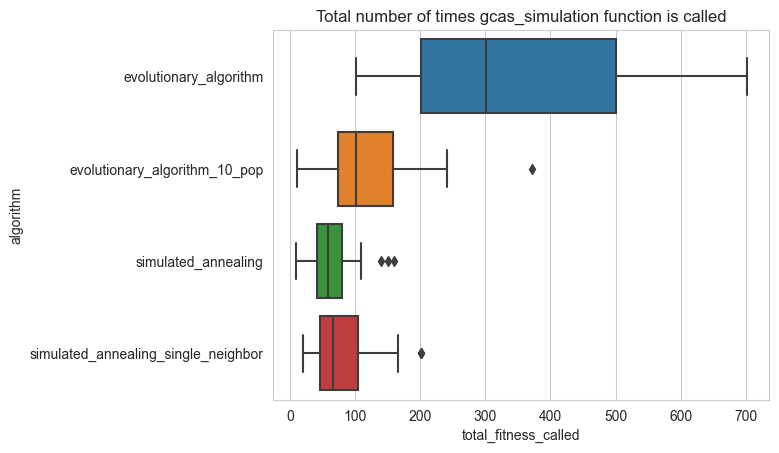

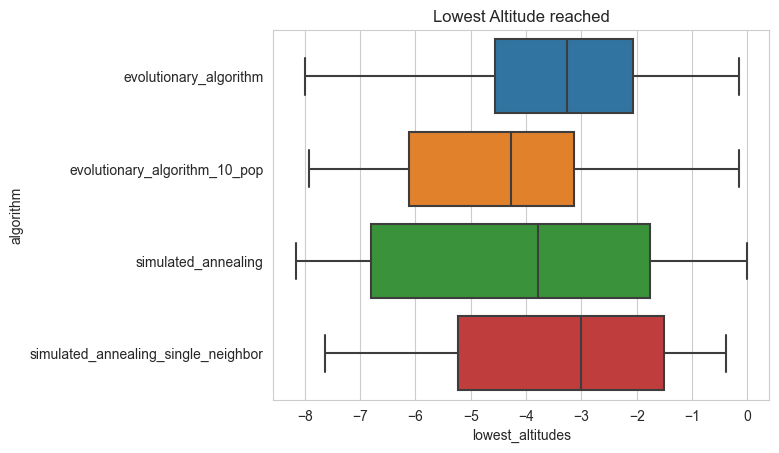

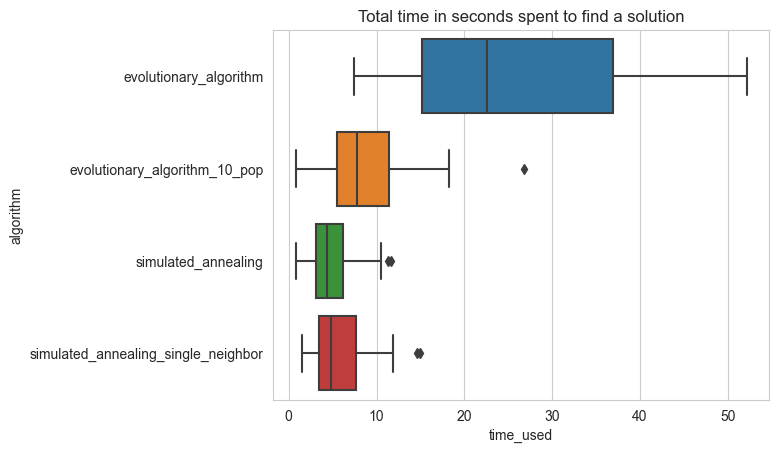

In [41]:
import matplotlib.pyplot as plt
rel = sns.boxplot(all_result, x='total_fitness_called', y='algorithm')
rel.set_title("Total number of times gcas_simulation function is called")
plt.figure()
rel = sns.boxplot(all_result, x='lowest_altitudes', y='algorithm')
rel.set_title("Lowest Altitude reached")
plt.figure()
rel = sns.boxplot(all_result, x='time_used', y='algorithm')
rel.set_title("Total time in seconds spent to find a solution")

# Statistical tests and Conclusion

Since the distributions of results normally dont follow normal distribution, we shall use man-whitney u test to check whether there are any differences in the result from different algorithms in term of the total number of calls on the evaluator functions.

The null hypothesis is as follows: Algorithm 1 takes the same number of calls to reach solution as algorithm 2.
The alternative hypothesis is as follows: Algorithm 1 takes a different number of calls to reach solution as algorithm 2.

There is a technically a way to initially test all of them together first but since it's clear seen in boxplots that EA and SA performance are different I will skip that part and perform statistical tests on each possible pair of algorithms.

I've pasted the result from cell below here and clean up some titles

----------------evolutionary_algorithm_100_pop vs evolutionary_algorithm_10_pop----------------

The observed differences in the results of algorithm evolutionary_algorithm and evolutionary_algorithm_10_pop for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. 

Two-sided Mann–Whitney U test, 

significance level = 0.05 , 

p-value =  2.623063817583435e-06

----------------evolutionary_algorithm_100_pop vs simulated_annealing----------------

The observed differences in the results of algorithm evolutionary_algorithm and simulated_annealing for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. 

Two-sided Mann–Whitney U test, 

significance level = 0.05 , 

p-value =  1.5603050093908562e-09

----------------evolutionary_algorithm_100_pop vs simulated_annealing_single_neighbor----------------

The observed differences in the results of algorithm evolutionary_algorithm and simulated_annealing_single_neighbor for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. 

Two-sided Mann–Whitney U test, 

significance level = 0.05 , 

p-value =  1.6229638053750703e-08

----------------evolutionary_algorithm_10_pop vs simulated_annealing----------------

The observed differences in the results of algorithm evolutionary_algorithm_10_pop and simulated_annealing for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. 

Two-sided Mann–Whitney U test, 

significance level = 0.05 , 

p-value =  0.0003342259476879228

----------------evolutionary_algorithm_10_pop vs simulated_annealing_single_neighbor----------------

The observed differences in the results of algorithm evolutionary_algorithm_10_pop and simulated_annealing_single_neighbor for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. 

Two-sided Mann–Whitney U test, 

significance level = 0.05 , 

p-value =  0.01587228559567226

----------------simulated_annealing_three_neighbors vs simulated_annealing_single_neighbor----------------

The observed differences in the results of algorithm simulated_annealing and simulated_annealing_single_neighbor for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are not statistically significant. 

Two-sided Mann–Whitney U test, 

significance level = 0.05 , 

p-value =  0.28368437915969213

Statistical Summary:
EA-100 vs EA-10: statistically significant - not the same

EA-100 vs SA-3: statistically significant - not the same

EA-100 vs SA-1: statistically significant - not the same

EA-10 vs SA-3: statistically significant - not the same

EA-10 vs SA-1: statistically significant - not the same

SA-3 vs SA-1: statistically insignificant - the same


Conclusion:
While the boxplots and descriptive statistics show some differences between SA-3 and SA-1, the difference are not strong enough to conclude that we can reject the null hypothesis that there is a difference between the 2.

Hence, while SA algogirthms are generally stronger than EA, we cannot say that generating 3 neighbors and 1 neighbor make a big difference.

In addition, we can conclude that keeping number of populations low might be a good idea to reduce the number of evaluation calls for EA since the null hypothesis that their number of calls are the same is rejected and from the boxplot EA-10 performs better than EA-100.



In [48]:
import scipy

def statistical_test(problem,
                     result1,
                     result2,
                     algorithm_name1,
                     algorithm_name2,
                     significance=0.1):
    U,p = scipy.stats.mannwhitneyu(result1, result2, alternative="two-sided")
    print("The observed differences in the results of algorithm {} and {} for the total number of gcas_simulation function calls of {} are ".format(
        algorithm_name1,
        algorithm_name2,
        problem
    ),
          end="")
    if p < significance:
        print("statistically significant.", end=" ")
    else:
        print("not statistically significant.", end=" ")
    print("Two-sided Mann–Whitney U test, significance level =",significance,", p-value = ",p)

algorithm_names = all_result['algorithm'].unique()
for ii in range(len(algorithm_names)-1):
    a1name = algorithm_names[ii]
    for jj in range(ii+1, len(algorithm_names)):
        a2name = algorithm_names[jj]
        print('----------------{} vs {}----------------'.format(a1name, a2name))
        statistical_test('Automatic Ground Collision Avoidance Problem',
                         all_result[all_result['algorithm'] == a1name]['total_fitness_called'].tolist(),
                         all_result[all_result['algorithm'] == a2name]['total_fitness_called'],
                         a1name,
                         a2name,
                         significance=0.05)



----------------evolutionary_algorithm vs evolutionary_algorithm_10_pop----------------
The observed differences in the results of algorithm evolutionary_algorithm and evolutionary_algorithm_10_pop for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. Two-sided Mann–Whitney U test, significance level = 0.05 , p-value =  2.623063817583435e-06
----------------evolutionary_algorithm vs simulated_annealing----------------
The observed differences in the results of algorithm evolutionary_algorithm and simulated_annealing for the total number of gcas_simulation function calls of Automatic Ground Collision Avoidance Problem are statistically significant. Two-sided Mann–Whitney U test, significance level = 0.05 , p-value =  1.5603050093908562e-09
----------------evolutionary_algorithm vs simulated_annealing_single_neighbor----------------
The observed differences in the results of algorithm evolutionary_algorithm a

In [44]:
print(algorithm_names)

['evolutionary_algorithm' 'evolutionary_algorithm_10_pop'
 'simulated_annealing' 'simulated_annealing_single_neighbor']
